In [1]:
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))
from config import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

# Read the data set

In [4]:
jpt_dir = os.getcwd()
base_dir = os.path.dirname(jpt_dir)
data_dir = os.path.join(base_dir, 'data')

data_fp = os.path.join(data_dir, 'php8Mz7BG.csv')

data = pd.read_csv(data_fp)

In [2]:
data.head()

,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,1
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,1
2,0.870593,-0.459862,0.578159,0.806634,0.835248,1
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,1
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,1


# Split data set into training set and test set

In [6]:
X_cols = [col for col in data.columns if col != 'Class']
X = data[X_cols]
y = data['Class']
y = y.where(y==1, other=0)  # change class label 2 to 0
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
np.sum(y)

3818

In [8]:
y_test.shape

(1622,)

In [9]:
np.sum(y_test==1)

1154

# Training and predict without pruning

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

## Learning curve

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

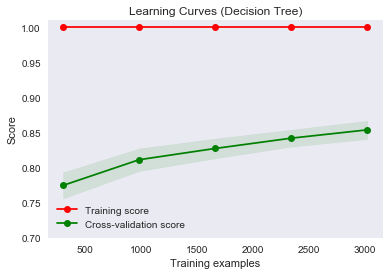

In [11]:
title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## Performance Mearsurement

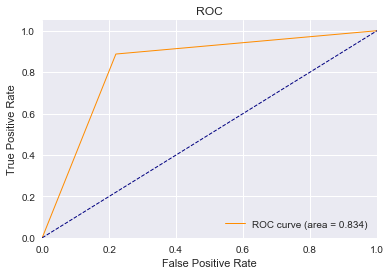

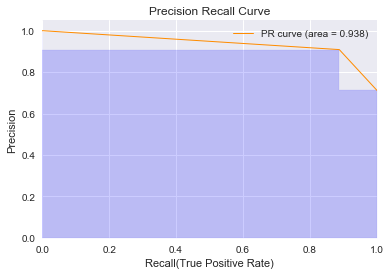

In [61]:
# # Accuracy, precision, recall, f1
# acc = accuracy_score(y_test, y_pred)
# cls_report = classification_report(y_test, y_pred)
# print(f'accuracy: {acc}')
# print(cls_report)

# # plot - confusion matrix
# ax_cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

# plot - ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# plot - PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = average_precision_score(y_test, y_prob[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1, label='PR curve (area = %0.3f)' % pr_auc)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="upper right")


# Training and predict with pruning

In [4]:
clf = DecisionTreeClassifier(max_depth=3)   # pre-pruning to prevent overfitting
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

## Learning curve

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

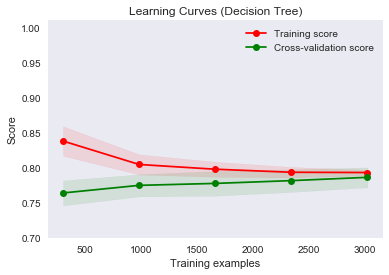

In [5]:
title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## Performance Mearsurement

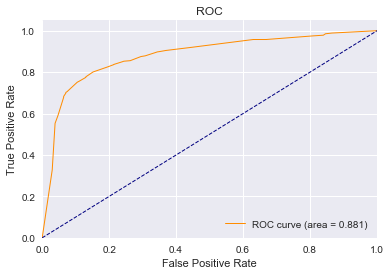

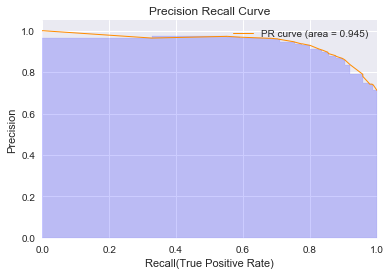

In [56]:
# plot - ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


# plot - PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
pr_auc = average_precision_score(y_test, y_prob[:, 1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=1, label='PR curve (area = %0.3f)' % pr_auc)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="upper right")
plt.show()